<a href="https://colab.research.google.com/github/subhash1612/MNIST-digit-classification/blob/master/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data() # Loading the data

11493376/11490434 [==============================] - 1s 0us/step


In [ ]:
(train_images,train_labels),(test_images,test_labels) = data #Splitting the data

In [ ]:
len(train_images)

60000

In [ ]:
len(train_labels)

60000

In [ ]:
len(test_images)

10000

In [ ]:
len(test_labels)

10000

In [ ]:
train_images = train_images.reshape((60000,28,28,1)) #(no of images,size of image,size of image, 1(for black and white images(grayscale)))

In [ ]:
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
train_images = train_images.astype('float')/255      #Doing normailisation (making values range from 0 to 1)

In [ ]:
test_images  = test_images.astype('float')/255

In [ ]:
from keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
train_labels[0]

5

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_orignal = train_labels

In [ ]:
train_labels = to_categorical(train_labels) #converting into a categorical vector

In [ ]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [ ]:
from keras import layers,models

In [ ]:
model = models.Sequential() #Building a sequential neural network(layers after layers)

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Convolutional layer of 32 neurons(units) Conv2d for 2d images(grayscale image)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
__________________________________________________

In [ ]:
model.add(layers.Dense(64, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
model.add(layers.Dense(10, activation='softmax')) #Softmax returns values between 0 and 1

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [ ]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy']) #optimiser defines how your model should learn and metrics returns what you want the model to return

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=64) 

Epoch 1/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.1574 - accuracy: 0.9511
Epoch 2/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0447 - accuracy: 0.9858
Epoch 3/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0321 - accuracy: 0.9900
Epoch 4/10
60000/60000 [==============================] - 9s 147us/step - loss: 0.0234 - accuracy: 0.9928
Epoch 5/10
60000/60000 [==============================] - 9s 152us/step - loss: 0.0189 - accuracy: 0.9940
Epoch 6/10
60000/60000 [==============================] - 9s 151us/step - loss: 0.0154 - accuracy: 0.9954
Epoch 7/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0124 - accuracy: 0.9960
Epoch 8/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0103 - accuracy: 0.9968
Epoch 9/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.0091 - accuracy: 0.9971
Epoch 10/10
60000/60000 [====================

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 119us/step


In [ ]:
test_accuracy


0.9919999837875366

In [ ]:
test_loss

0.039213045566792185

In [ ]:
predictions = model.predict(test_images) #Making a prediction


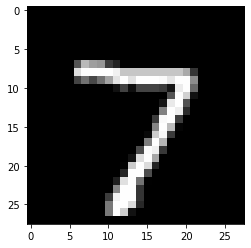

In [ ]:
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [ ]:
test_labels_original[0]

7

In [ ]:
predictions[0]

array([3.6844439e-14, 1.7808535e-12, 7.6074222e-09, 1.4594790e-09,
       4.3808739e-13, 1.6090057e-15, 6.3770597e-22, 1.0000000e+00,
       7.9355637e-14, 1.1979602e-11], dtype=float32)